In [2]:
import tensorflow as tf
from keras.applications.efficientnet_v2 import EfficientNetV2B2
from SegmentationModels import DeepLabeV3plus

In [9]:
model = DeepLabeV3plus(input_shape=(1024,2048,3),
                       filters=[16,32,64,128,256],
                       num_classes=20,
                       activation='leaky_relu',
                       dropout_rate=0.0,
                       backbone_name='EfficientNetB4',
                       freeze_backbone=False,
                       unfreeze_at='block6a_expand_activation'
                       )

model.summary()

Model: "DeepLabV3plus"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 1024, 2048,  0           []                               
                                 3)]                                                              
                                                                                                  
 EfficientNetB4_backbone (Funct  [(None, 512, 1024,   17673823   ['input_6[0][0]']                
 ional)                         144),                                                             
                                 (None, 256, 512, 1                                               
                                92),                                                              
                                 (None, 128, 256, 3                                   

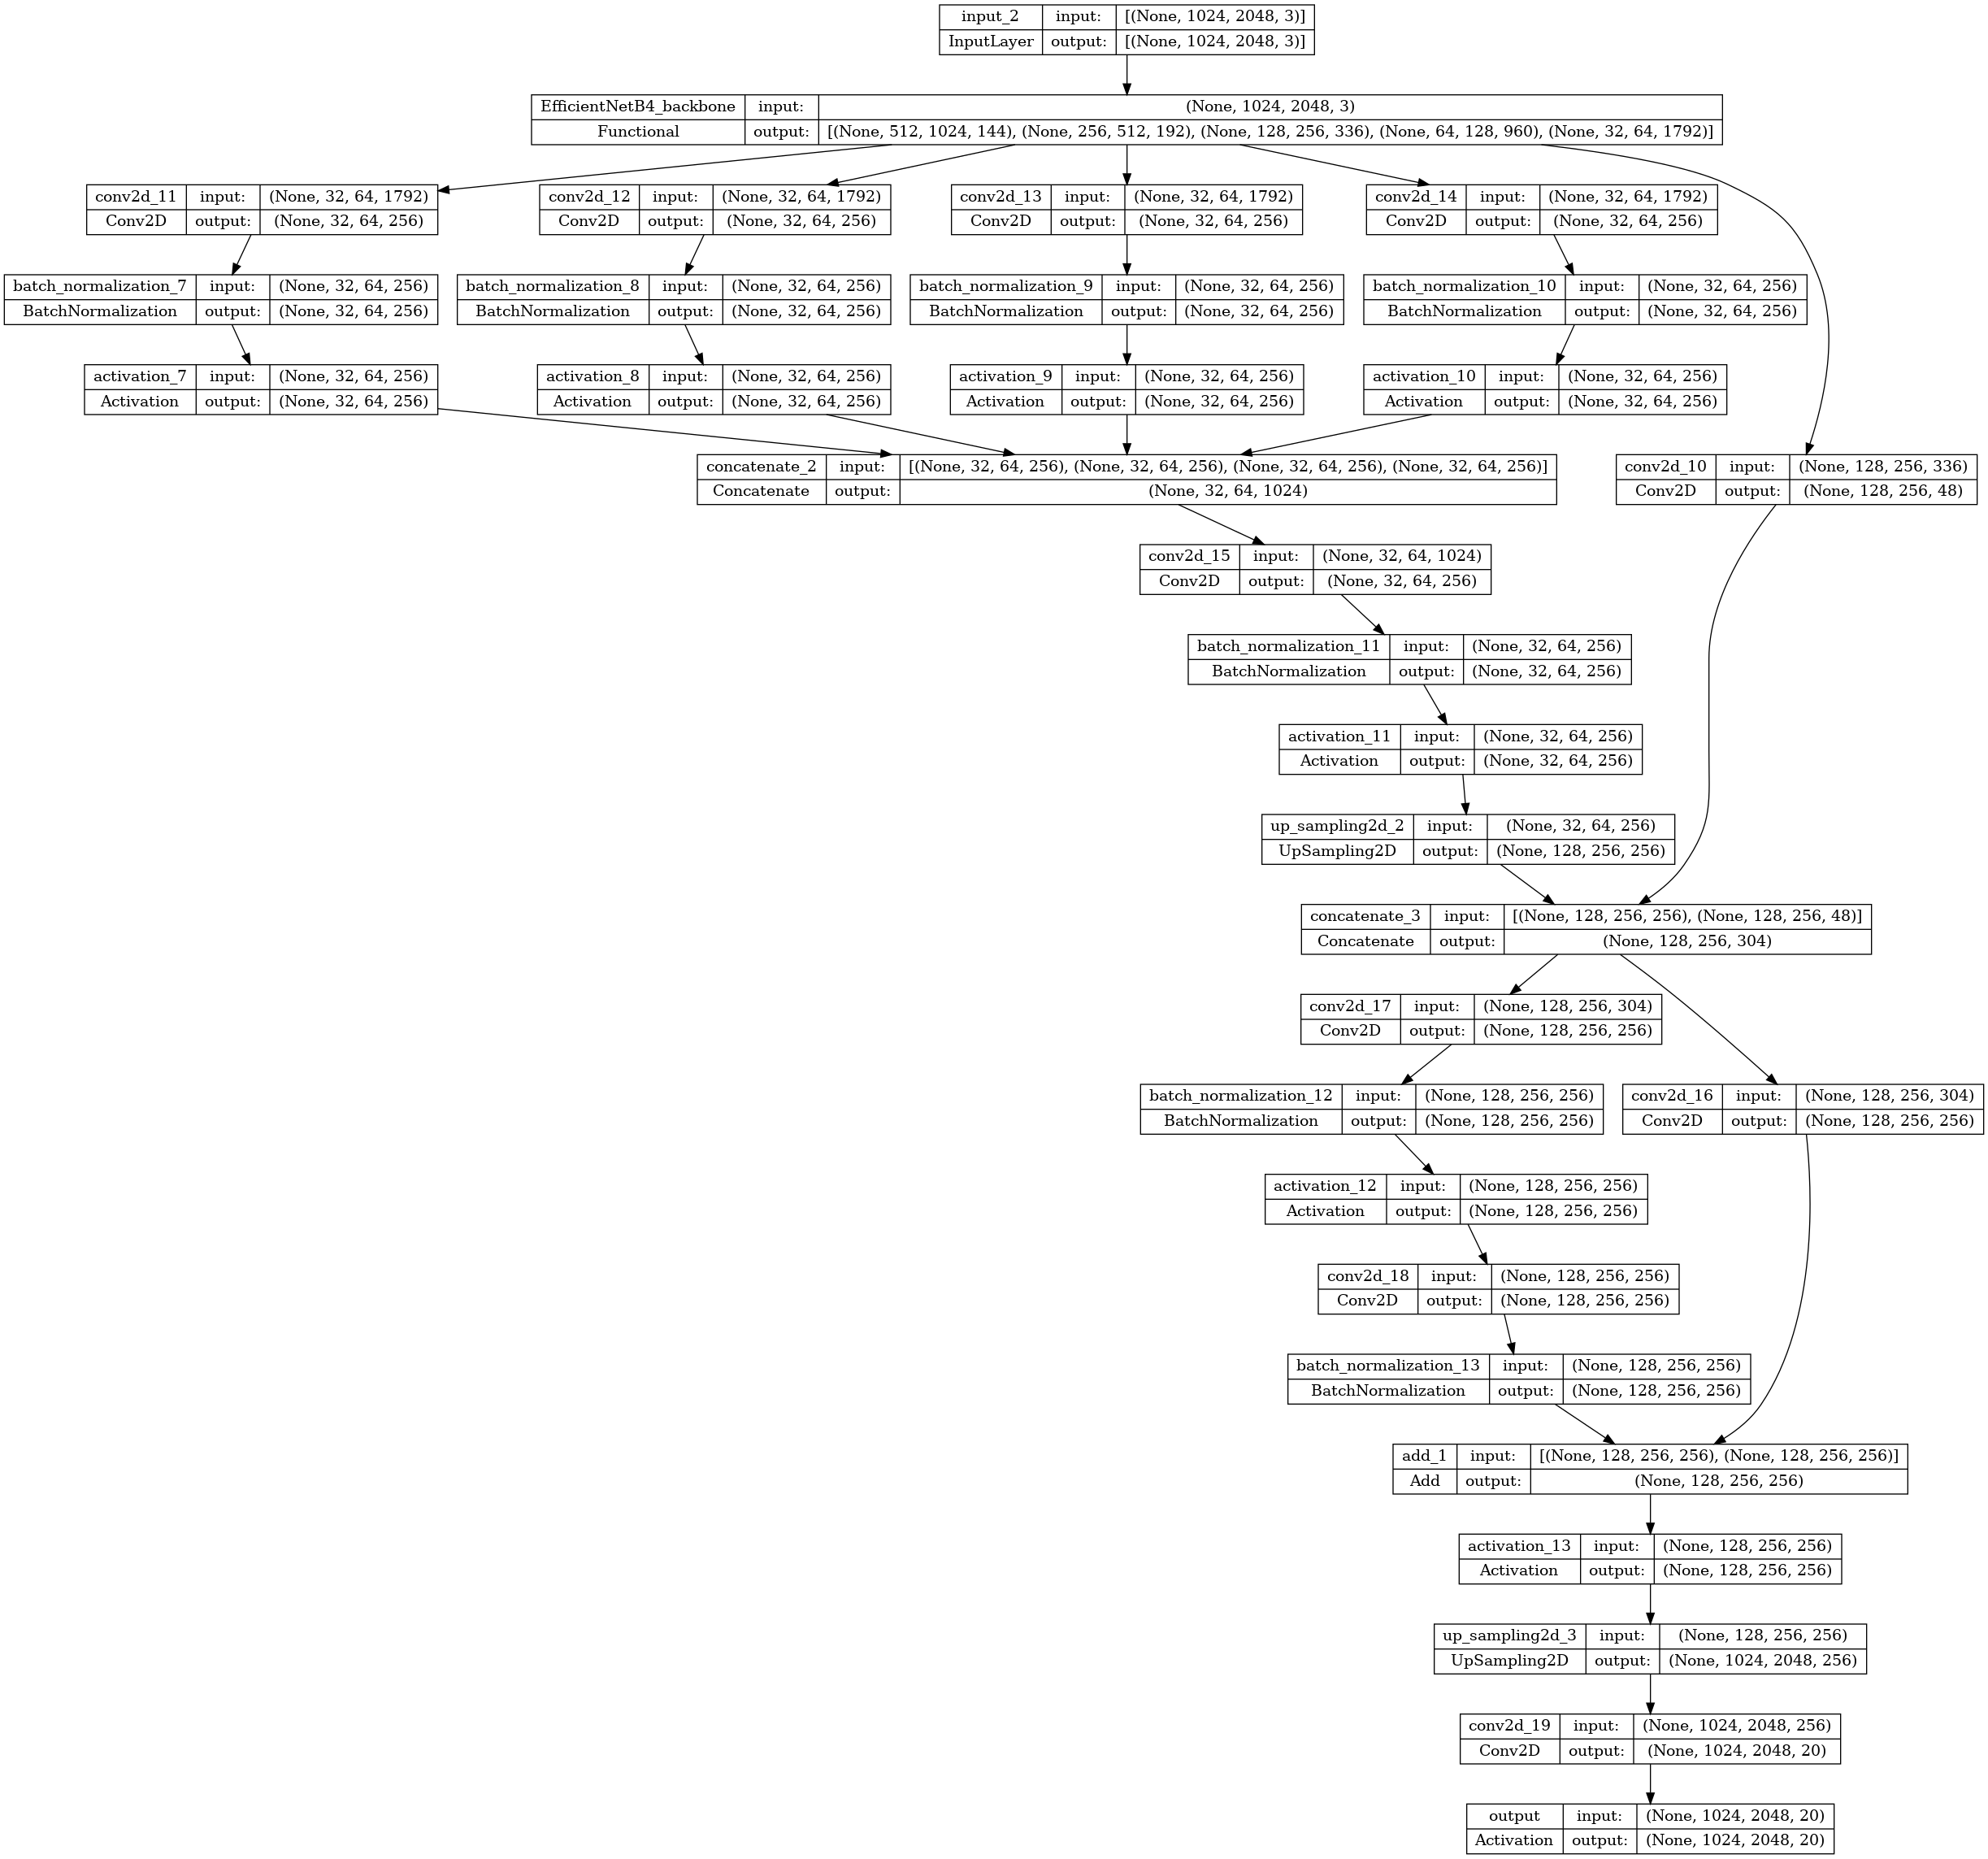

In [5]:
tf.keras.utils.plot_model(model,
                          f"{model.name}.png",
                          show_shapes=True)